In [3]:
%cd drive/MyDrive/multimedia/hw3

/content/drive/MyDrive/multimedia/hw3


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import dctn, idctn
from math import log10, sqrt


<div dir="rtl">

با سلام، در سوال دوم این تکلیف از پکیج scipy استفاده شده است. اگر این پکیج را 
بصورت نصب شده ندارید با استفاده از دستور زیر لطفا آنرا نصب نمائید.

<div>

In [17]:
!pip install scipy

# Q1.a


<div dir="rtl">

با استفاده از تابع زیر هیستوگرام تصویر را محاسبه می‌کنیم.

<div>

In [18]:
def imhist(im):
  m, n = im.shape
  h = [0.0] * 256
  for i in range(m):
    for j in range(n):
      h[im[i, j]]+=1
  return np.array(h)

<div dir="rtl">

این تابع بعنوان ورودی هیستوگرام و یک عدد بعنوان سطح آستانه دریافت می‌کند، سپس بررسی میکند تا چه سطح روشنائی مجموع تعداد پیکسلها کوچکتر از سطح آستانه داده شده است و آن سطح روشنائی را بعنوان خروجی باز می‌گرداند.

<div>

In [19]:
def take_T(hist, thresh):
  sum = 0
  for i in range(0,256):
    sum += hist[i]
    if sum >= thresh:
      break
  return i

<div dir="rtl">

این تابع بعنوان ورودی یک تصویر یک مقدار و دو آستانه دریافت می‌کند، سپس در تصویر ورودی مقدار پیکسلهایی که سطح روشنائی آنها بین دو سطح آستانه است را با مقدار داده شده، مقداردهی می‌کند.

<div>

In [20]:
def new_assign(image, value, T1, T2):
  out = np.copy(image)
  for m in range(image.shape[0]):
    for n in range(image.shape[1]):
      if T1 <= image[m][n] <= T2:
        out[m][n] = value
  return out

<div dir="rtl">

در این تابع تصویر اولیه را دریافت می‌کند و تصویری را بعنوان خروجی باز می‌گرداند که تنها چهار سطح روشنائی دارد. این سطوح به گونه ای انتخاب شده اند  که از نظر آماری توزیع یکنواختی داشته باشند.

<div>

In [21]:
def hist_median(image):
  hist = imhist(image)
  num = image.shape[0]*image.shape[1]
  i = take_T(hist, num/4)
  j = take_T(hist, num/2)
  k = take_T(hist, 3*num/4)

  image = new_assign(image, i/2, 0, i)
  image = new_assign(image, (i+j)/2, i, j)
  image = new_assign(image, (k+j)/2, j, k)
  image = new_assign(image, (255+k)/2, k, 255)

  plt.imshow(image, cmap='gray')
  return image

<div dir="rtl">

خروجی پیاده سازی ما:

<div>

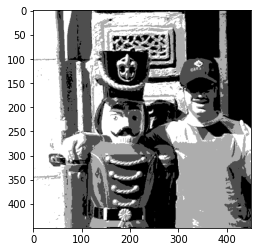

In [22]:
img1 = plt.imread("2.tif")
out1 = hist_median(img1)

In [23]:
np.unique(out1)

array([ 26,  88, 162, 227], dtype=uint8)

<div dir="rtl">

نمایش تصویری که تمام پیکسلها بر ۶۴ تقسیم و در ۶۴ ضرب شده اند:

<div>

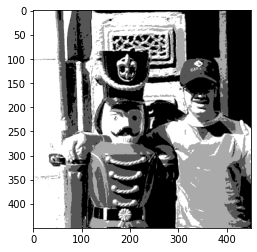

In [8]:
out2 = np.zeros((img1.shape[0], img1.shape[1]))
for m in range(img1.shape[0]):
  for n in range(img1.shape[1]):
    temp = int(img1[m][n]/64)
    out2[m][n] = temp*64
plt.imshow(out2, cmap='gray')

<div dir="rtl">

نتیجه گیری: هر دو تصویر ۴ سطح روشنائی دارند اما این چهار سطح در دو تصویر مقادیر متفاوتی به خود گرفته اند. دلیل این امر آن است که در روش دوم از نظر آماری سعی بر این بود که تعداد پیکسلهای هر سطح توزیع یکنواخت داشته باشند اما در روش دوم تصویر بصورت ساده کوانتیزه شده است. اگرچه هر دو تصویر از نظر بصری بسیار به یکدیگر شباهت دارند.

<div>

#Q1.b

<div dir="rtl">

این قسمت تغییر یافته قسمت الف است، دقیقا از همان توابعی که قبلا توضیح داده ایم برای پیاده سازی این قسمت استفاده کرده ایم.

<div>

In [9]:
def hist_median(image, n):
  hist = imhist(image)
  num = image.shape[0]*image.shape[1]
  thresholds = np.zeros(((2**n)+1))
  thresholds[0] = 0
  thresholds[2**n] = 255
  for i in range(2**n-1):
    thresholds[i+1] = take_T(hist, (i+1)*num/2**n)
  for i in range(2**n):
    image = new_assign(image, (thresholds[i]+thresholds[i+1])/2, thresholds[i], thresholds[i+1])
  plt.imshow(image, cmap='gray')
  return image

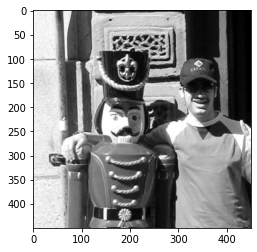

In [10]:
img1 = plt.imread("2.tif")
out1 = hist_median(img1, 6)

# Q2

<div dir="rtl">

در این تابع دو تصویر بعنوان ورودی دریافت می‌کنیم و بعنوان خروجی PSNR این دو تصویر را گزارش می‌دهیم:

<div>

In [5]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

<div dir="rtl">

در این تابع با در نظر گرفتن K تصویر را به قطعات K در میشکنیم و برای هر قسمت ضرایب DCT را محاسبه می‌کنیم و بعد از مقایسه قدرمطلق ضرایب با سطح آستانه داده شده، مقادیری که از آستانه کمتر هستند صفر میشوند و برای ضرایب جدید IDCT را محاسبه می‌کنیم و از روی خروجی این قسمت و با در کنار هم قرار دادن قطعات خروجی تصویر نهائی را می‌سازیم.

همچنین درصد ضرایبی که تغییر کرده اند را محاسبه و چاپ کرده ایم.

برای تصویر ریسایز شده و تصویر خروجی PSNR را حساب کرده و نمایش می‌دهیم.

تصویر اولیه ریسایز شده - تصویر خروجی - قدر مطلق اختلاف این دو تصویر نمایش داده شده است.

<div>

<div dir="rtl">

توجه****** در این قسمت از توابع DCT و IDCT پکیج SciPy استفاده شده است***

<div>

In [13]:
def hw3_dct(I, K, t):
  counter = 0
  delta_H = I.shape[0]%K
  delta_W = I.shape[1]%K
  if delta_H > 0:
    delta_H = K - delta_H
  if delta_W > 0:
    delta_W = K - delta_W
  J = cv2.resize(I, (I.shape[0] + delta_H, I.shape[1] + delta_W)).astype("float")
  T = np.zeros((J.shape[0], J.shape[1]))
  OUT = np.zeros((J.shape[0], J.shape[1]))
  for i in range(0, I.shape[0], K):
    for j in range(0, I.shape[1], K):
      d = dctn(J[i:i+K, j:j+K])
      T[i:i+K, j:j+K] = d*(abs(d)>=t)
      counter += (K**2) - (abs(d)>=t).sum()
      OUT[i:i+K, j:j+K] = idctn(T[i:i+K, j:j+K])
  fig = plt.figure(figsize = (22, 22))
  fig.add_subplot(1, 3, 1)
  plt.title("Original Image")
  plt.imshow(I, cmap = 'gray')
  fig.add_subplot(1, 3, 2)
  plt.title("After DCT transform")
  plt.imshow(OUT, cmap = 'gray')
  fig.add_subplot(1, 3, 3)
  plt.title("abs(J - OUT)")
  plt.imshow(abs(J - OUT), cmap = 'gray')
  print("Percentage: ", counter/(J.shape[0]*J.shape[1]))
  print("PSNR: ", PSNR(J, OUT))
  return OUT

Percentage:  0.007050246229609111
PSNR:  151.92421679709315


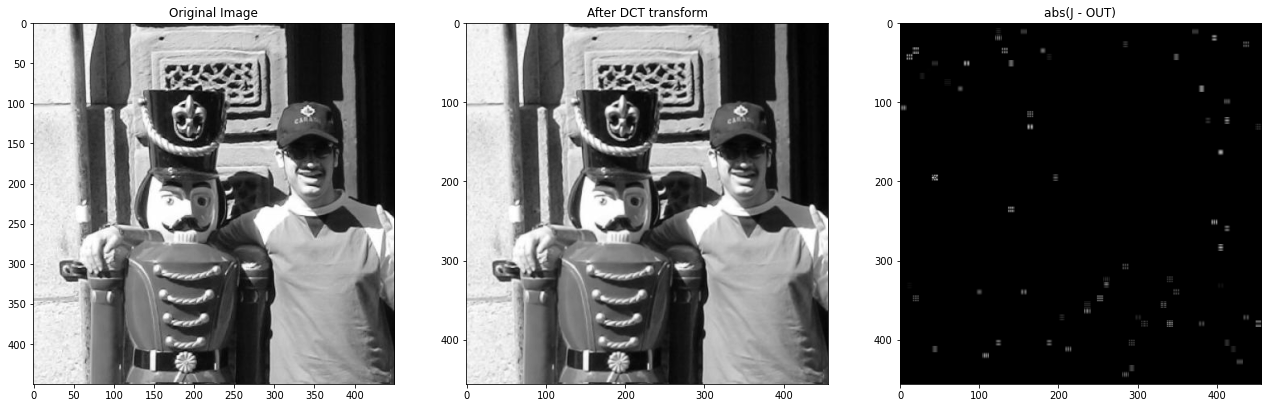

In [14]:
img = plt.imread("2.tif")
out = hw3_dct(img, 8, 0.01)

<div dir="rtl">

توجه****** در این قسمت از توابع DCT و IDCT پکیج OpenCV استفاده شده است***

<div>

In [15]:
def hw3_dct(I, K, t):
  counter = 0
  delta_H = I.shape[0]%K
  delta_W = I.shape[1]%K
  if delta_H > 0:
    delta_H = K - delta_H
  if delta_W > 0:
    delta_W = K - delta_W
  J = cv2.resize(I, (I.shape[0] + delta_H, I.shape[1] + delta_W)).astype("float")
  T = np.zeros((J.shape[0], J.shape[1]))
  OUT = np.zeros((J.shape[0], J.shape[1]))
  for i in range(0, I.shape[0], K):
    for j in range(0, I.shape[1], K):
      d = cv2.dct(J[i:i+K, j:j+K])
      T[i:i+K, j:j+K] = d*(abs(d)>=t)
      counter += (K**2) - (abs(d)>=t).sum()
      OUT[i:i+K, j:j+K] = cv2.idct(T[i:i+K, j:j+K])
  fig = plt.figure(figsize = (22, 22))
  fig.add_subplot(1, 3, 1)
  plt.title("Original Image")
  plt.imshow(I, cmap = 'gray')
  fig.add_subplot(1, 3, 2)
  plt.title("After DCT transform")
  plt.imshow(OUT, cmap = 'gray')
  fig.add_subplot(1, 3, 3)
  plt.title("abs(J - OUT)")
  plt.imshow(abs(J - OUT), cmap = 'gray')
  print("Percentage: ", counter/(J.shape[0]*J.shape[1]))
  print("PSNR: ", PSNR(J, OUT))
  return OUT

Percentage:  0.013677285318559556
PSNR:  114.20653690960835


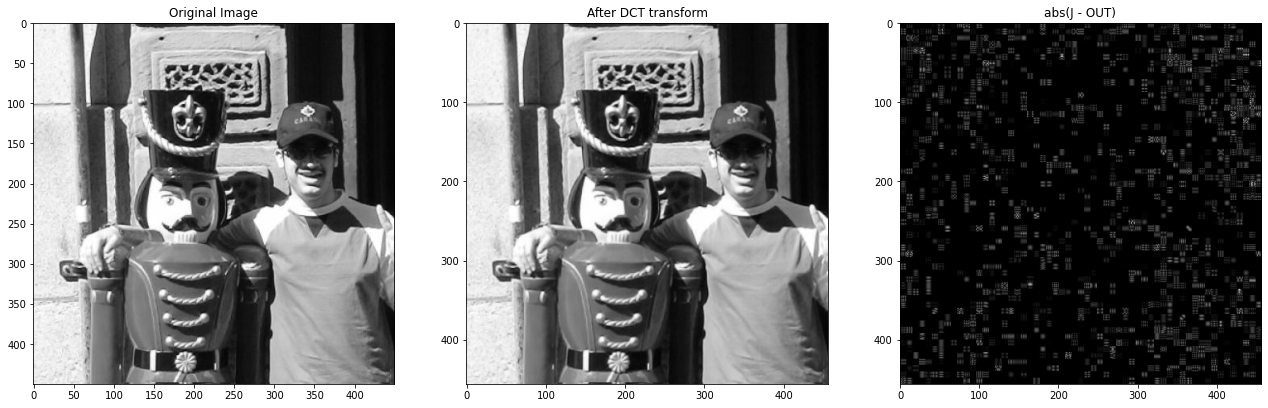

In [16]:
img = plt.imread("2.tif")
out2 = hw3_dct(img, 8, 0.01)